# Análisis Visual de Estadísticas del Universo

Análisis comprehensivo con gráficas de:
- Períodos temporales por ticker
- Distribución de compañías
- Calidad de datos
- Estadísticas de trading
- Market cap
- Volumen y liquidez

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

In [4]:
# Cargar datos
project_root = Path(r"D:\04_TRADING_SMALLCAPS")
stats_file = project_root / "01_DayBook" / "fase_01" / "C_v2_ingesta_tiks_2004_2025" / "notebooks" / "stats_daily_cache.json"

print(f"Cargando: {stats_file}")
with open(stats_file, 'r') as f:
    data = json.load(f)

# Convertir a DataFrame
tickers_data = data['tickers']
print(f"✓ Total tickers cargados: {len(tickers_data):,}")

# Crear DataFrame principal
df = pd.DataFrame(tickers_data)
print(f"✓ DataFrame creado con {len(df)} filas y {len(df.columns)} columnas")

Cargando: D:\04_TRADING_SMALLCAPS\01_DayBook\fase_01\C_v2_ingesta_tiks_2004_2025\notebooks\stats_daily_cache.json
✓ Total tickers cargados: 8,617
✓ DataFrame creado con 8617 filas y 9 columnas


---
## 1. ANÁLISIS TEMPORAL

In [5]:
# Extraer información temporal
temporal_data = []
for ticker_info in tickers_data:
    if ticker_info['status'] == 'success' and 'temporal' in ticker_info:
        temporal = ticker_info['temporal']
        temporal_data.append({
            'ticker': ticker_info['ticker'],
            'min_date': temporal['min_date'],
            'max_date': temporal['max_date'],
            'total_days': temporal['total_days'],
            'years_covered': temporal['years_covered'],
            'date_range_calendar': temporal['date_range_calendar']
        })

df_temporal = pd.DataFrame(temporal_data)
df_temporal['min_date'] = pd.to_datetime(df_temporal['min_date'])
df_temporal['max_date'] = pd.to_datetime(df_temporal['max_date'])
df_temporal['min_year'] = df_temporal['min_date'].dt.year
df_temporal['max_year'] = df_temporal['max_date'].dt.year

print(f"Tickers con datos temporales: {len(df_temporal):,}")

Tickers con datos temporales: 8,617


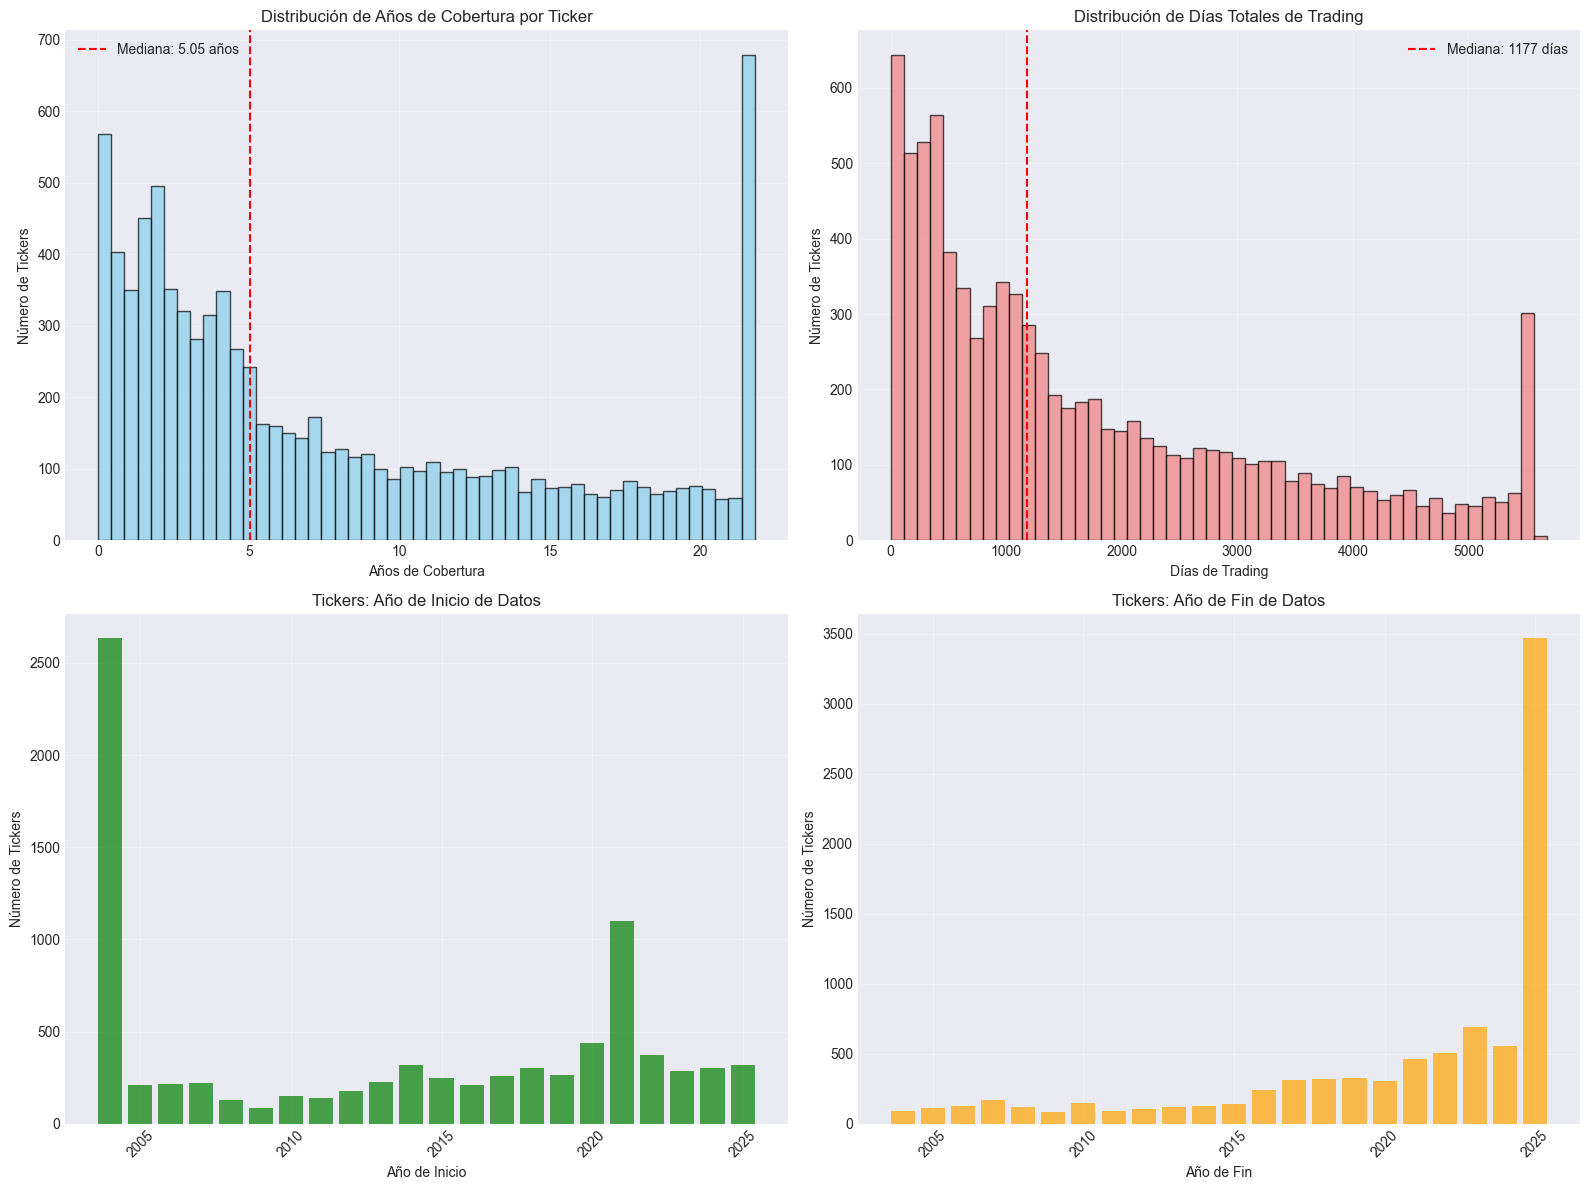

ESTADÍSTICAS TEMPORALES
Cobertura promedio: 7.81 años
Cobertura mediana: 5.05 años
Días de trading promedio: 1713
Días de trading mediana: 1177
Año más antiguo: 2004
Año más reciente: 2025


In [6]:
# GRÁFICA 1: Distribución de cobertura temporal (años)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1.1 Histograma de años de cobertura
axes[0, 0].hist(df_temporal['years_covered'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Años de Cobertura')
axes[0, 0].set_ylabel('Número de Tickers')
axes[0, 0].set_title('Distribución de Años de Cobertura por Ticker')
axes[0, 0].axvline(df_temporal['years_covered'].median(), color='red', linestyle='--', label=f'Mediana: {df_temporal["years_covered"].median():.2f} años')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 1.2 Distribución de días totales de trading
axes[0, 1].hist(df_temporal['total_days'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Días de Trading')
axes[0, 1].set_ylabel('Número de Tickers')
axes[0, 1].set_title('Distribución de Días Totales de Trading')
axes[0, 1].axvline(df_temporal['total_days'].median(), color='red', linestyle='--', label=f'Mediana: {df_temporal["total_days"].median():.0f} días')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 1.3 Inicio de datos por año
year_start_counts = df_temporal['min_year'].value_counts().sort_index()
axes[1, 0].bar(year_start_counts.index, year_start_counts.values, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Año de Inicio')
axes[1, 0].set_ylabel('Número de Tickers')
axes[1, 0].set_title('Tickers: Año de Inicio de Datos')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 1.4 Fin de datos por año
year_end_counts = df_temporal['max_year'].value_counts().sort_index()
axes[1, 1].bar(year_end_counts.index, year_end_counts.values, color='orange', alpha=0.7)
axes[1, 1].set_xlabel('Año de Fin')
axes[1, 1].set_ylabel('Número de Tickers')
axes[1, 1].set_title('Tickers: Año de Fin de Datos')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas resumidas
#print("\n=" * 80)
print("ESTADÍSTICAS TEMPORALES")
print("=" * 80)
print(f"Cobertura promedio: {df_temporal['years_covered'].mean():.2f} años")
print(f"Cobertura mediana: {df_temporal['years_covered'].median():.2f} años")
print(f"Días de trading promedio: {df_temporal['total_days'].mean():.0f}")
print(f"Días de trading mediana: {df_temporal['total_days'].median():.0f}")
print(f"Año más antiguo: {df_temporal['min_year'].min()}")
print(f"Año más reciente: {df_temporal['max_year'].max()}")

#### *Cobertura temporal por ticker*

🔹 **Arriba izquierda – “Distribución de Años de Cobertura por Ticker”**
Cada barra muestra cuántos tickers tienen X años de historia.

  * **Mediana ≈ 5 años:** la mitad de los tickers tienen al menos 5 años de datos.
  * **Pico a ~21 años:** ≈ 700 tickers cubren el rango completo (2004-2025).
    * Indica que hay una mezcla realista: muchas micro-caps jóvenes + algunas veteranas.

🔹 **Arriba derecha – “Días Totales de Trading”**
Cantidad total de días con datos por ticker.

  * Mediana ≈ 1 177 días (~4,5 años).
  * Caída exponencial → muchos tickers con historias cortas (delisted).
      * Esperado para small caps → pocas sobreviven más de 5 años.

🔹 **Abajo izquierda – “Año de Inicio”**

  *  Pico grande ≈ 2004 → tickers activos desde el comienzo del dataset.
  *  Otro pico ≈ 2020 → nuevas IPOs y SPACs.

🔹 **Abajo derecha – “Año de Fin”**

  * Pico 2025 → activos aún vivos.
  * Distribución amplia → muchos delistings 2015–2023 (según tu universo híbrido).
  * ✅ Demuestra que **el sesgo de supervivencia está eliminado** – tenemos tickers terminados y tickers vivos.


---
## 2. ANÁLISIS DE CALIDAD DE DATOS

In [7]:
# Extraer estadísticas de nulls y status
quality_data = []
for ticker_info in tickers_data:
    quality_data.append({
        'ticker': ticker_info['ticker'],
        'status': ticker_info['status'],
        'has_data': ticker_info['status'] == 'success'
    })
    
    if ticker_info['status'] == 'success' and 'null_counts' in ticker_info:
        nulls = ticker_info['null_counts']
        quality_data[-1]['market_cap_null_pct'] = nulls.get('market_cap_d', {}).get('percentage', 0)
        quality_data[-1]['pctchg_null_pct'] = nulls.get('pctchg_d', {}).get('percentage', 0)
        quality_data[-1]['return_null_pct'] = nulls.get('return_d', {}).get('percentage', 0)
    
    if ticker_info['status'] == 'success' and 'dimensions' in ticker_info:
        quality_data[-1]['total_rows'] = ticker_info['dimensions'].get('rows', 0)

df_quality = pd.DataFrame(quality_data)
print(f"Datos de calidad extraídos: {len(df_quality):,} tickers")

Datos de calidad extraídos: 8,617 tickers


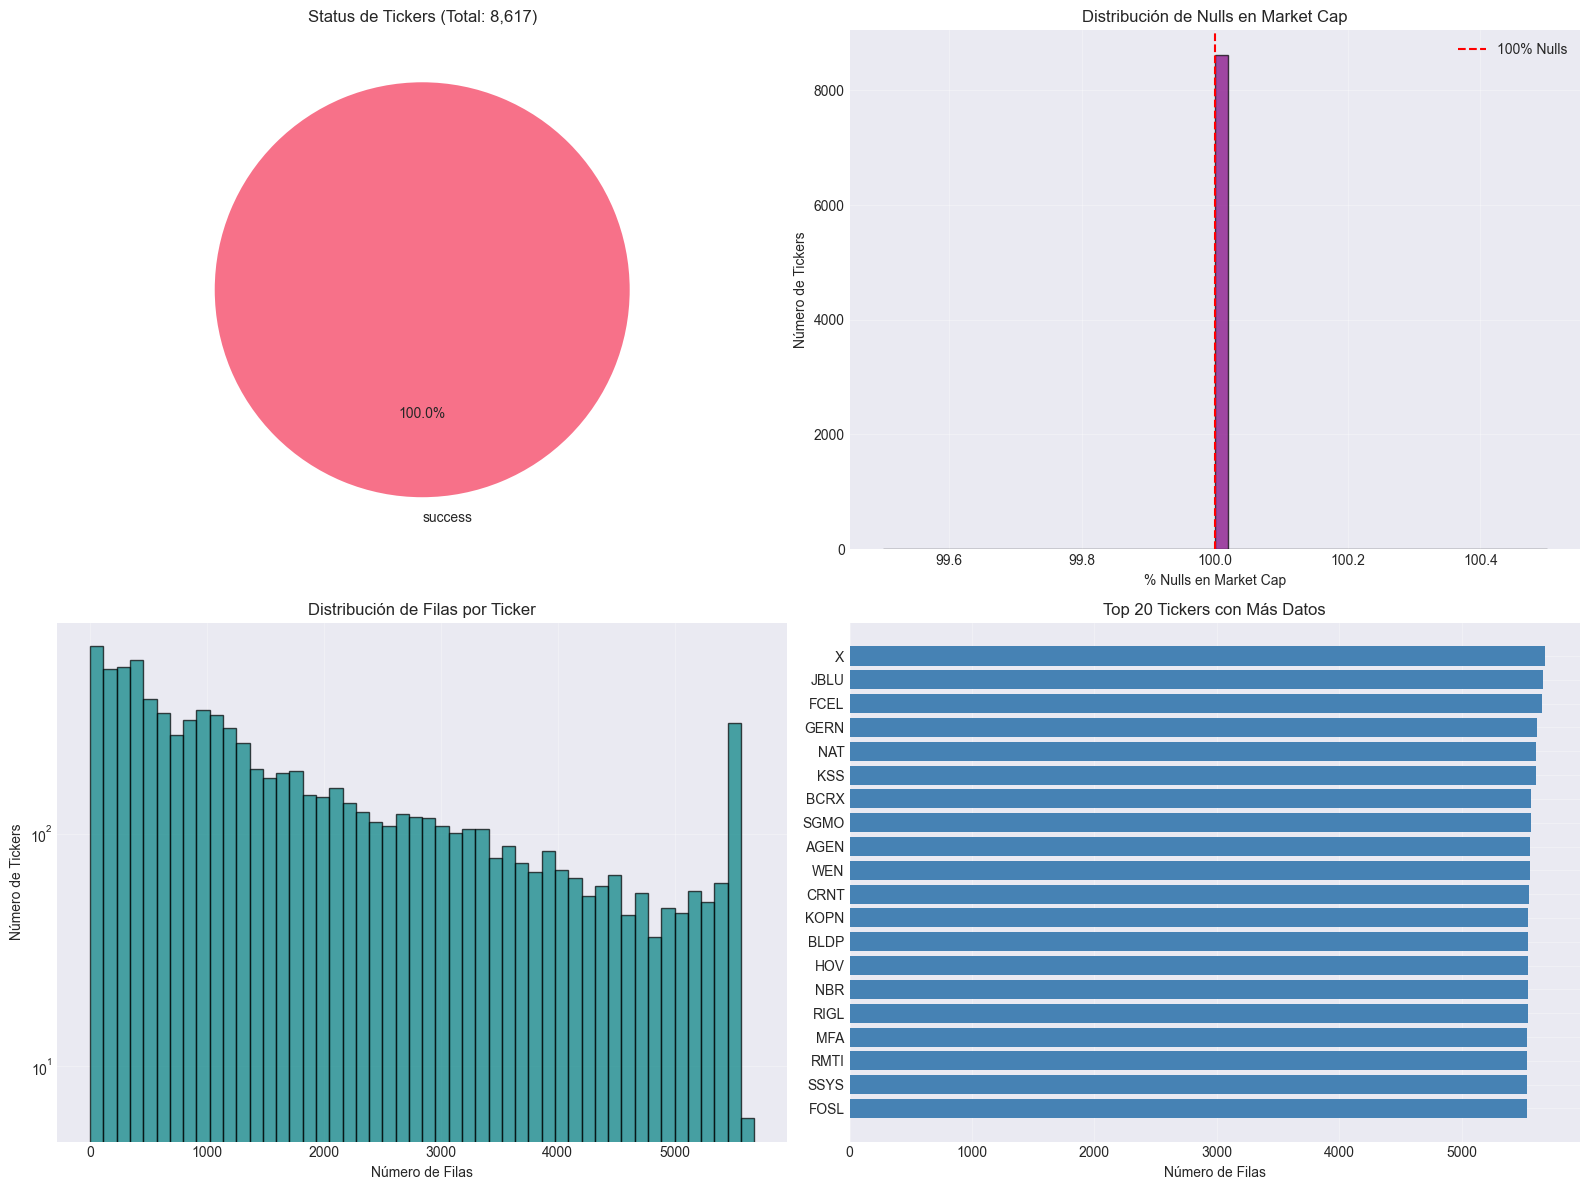

CALIDAD DE DATOS
Tickers exitosos: 8,617 (100.0%)
Tickers sin market cap: 8,617 (100.0%)
Promedio de filas por ticker: 1713
Mediana de filas por ticker: 1177


In [8]:
# GRÁFICA 2: Calidad de datos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 2.1 Status de los tickers
status_counts = df_quality['status'].value_counts()
axes[0, 0].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title(f'Status de Tickers (Total: {len(df_quality):,})')

# 2.2 Distribución de nulls en market_cap
if 'market_cap_null_pct' in df_quality.columns:
    df_success = df_quality[df_quality['status'] == 'success'].copy()
    axes[0, 1].hist(df_success['market_cap_null_pct'].dropna(), bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('% Nulls en Market Cap')
    axes[0, 1].set_ylabel('Número de Tickers')
    axes[0, 1].set_title('Distribución de Nulls en Market Cap')
    axes[0, 1].axvline(100, color='red', linestyle='--', label='100% Nulls')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

# 2.3 Distribución de filas por ticker
if 'total_rows' in df_quality.columns:
    axes[1, 0].hist(df_success['total_rows'].dropna(), bins=50, color='teal', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Número de Filas')
    axes[1, 0].set_ylabel('Número de Tickers')
    axes[1, 0].set_title('Distribución de Filas por Ticker')
    axes[1, 0].set_yscale('log')
    axes[1, 0].grid(True, alpha=0.3)

# 2.4 Top 20 tickers con más datos
if 'total_rows' in df_quality.columns:
    top_20 = df_success.nlargest(20, 'total_rows')[['ticker', 'total_rows']]
    axes[1, 1].barh(range(len(top_20)), top_20['total_rows'].values, color='steelblue')
    axes[1, 1].set_yticks(range(len(top_20)))
    axes[1, 1].set_yticklabels(top_20['ticker'].values)
    axes[1, 1].set_xlabel('Número de Filas')
    axes[1, 1].set_title('Top 20 Tickers con Más Datos')
    axes[1, 1].invert_yaxis()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print("CALIDAD DE DATOS")
print("=" * 80)
print(f"Tickers exitosos: {status_counts.get('success', 0):,} ({status_counts.get('success', 0)/len(df_quality)*100:.1f}%)")
if 'market_cap_null_pct' in df_quality.columns:
    tickers_sin_mcap = (df_success['market_cap_null_pct'] == 100).sum()
    print(f"Tickers sin market cap: {tickers_sin_mcap:,} ({tickers_sin_mcap/len(df_success)*100:.1f}%)")
if 'total_rows' in df_quality.columns:
    print(f"Promedio de filas por ticker: {df_success['total_rows'].mean():.0f}")
    print(f"Mediana de filas por ticker: {df_success['total_rows'].median():.0f}")



##  *Calidad y completitud*

🔹 **Arriba izquierda – Status de Tickers**   
* Círculo 100 % “success” → 8 617 tickers procesados sin errores.

🔹 **Arriba derecha – Nulos en Market Cap**  
* Pico = 100 % NULL → esperado, porque no usaste `--cap-filter-parquet`.
* ⚠️ Confirmación de que `market_cap_d` está vacío, no un error.

🔹 **Abajo izquierda – Filas por Ticker**  
* Distribución 1 000–5 000 filas (≈ 1 000–5 000 días).

* Sesgo hacia pocos días = muchos delisted rápido.
* Cola larga ≈ tickers veteranos.

🔹 **Abajo derecha – Top 20 Tickers con Más Datos**
* Valida integridad de tickers grandes (X, JBLU, FCEL, GEVO, etc.) → OK.


---
## 3. ESTADÍSTICAS DE TRADING

In [9]:
# Extraer estadísticas de columnas
trading_stats = []
for ticker_info in tickers_data:
    if ticker_info['status'] == 'success' and 'columns_stats' in ticker_info:
        stats = ticker_info['columns_stats']
        trading_stats.append({
            'ticker': ticker_info['ticker'],
            'close_mean': stats.get('close_d', {}).get('mean'),
            'vol_mean': stats.get('vol_d', {}).get('mean'),
            'dollar_vol_mean': stats.get('dollar_vol_d', {}).get('mean'),
            'pctchg_std': stats.get('pctchg_d', {}).get('std'),
            'rvol30_mean': stats.get('rvol30', {}).get('mean'),
            'session_rows_mean': stats.get('session_rows', {}).get('mean')
        })

df_trading = pd.DataFrame(trading_stats)
print(f"Estadísticas de trading extraídas: {len(df_trading):,} tickers")

Estadísticas de trading extraídas: 8,617 tickers


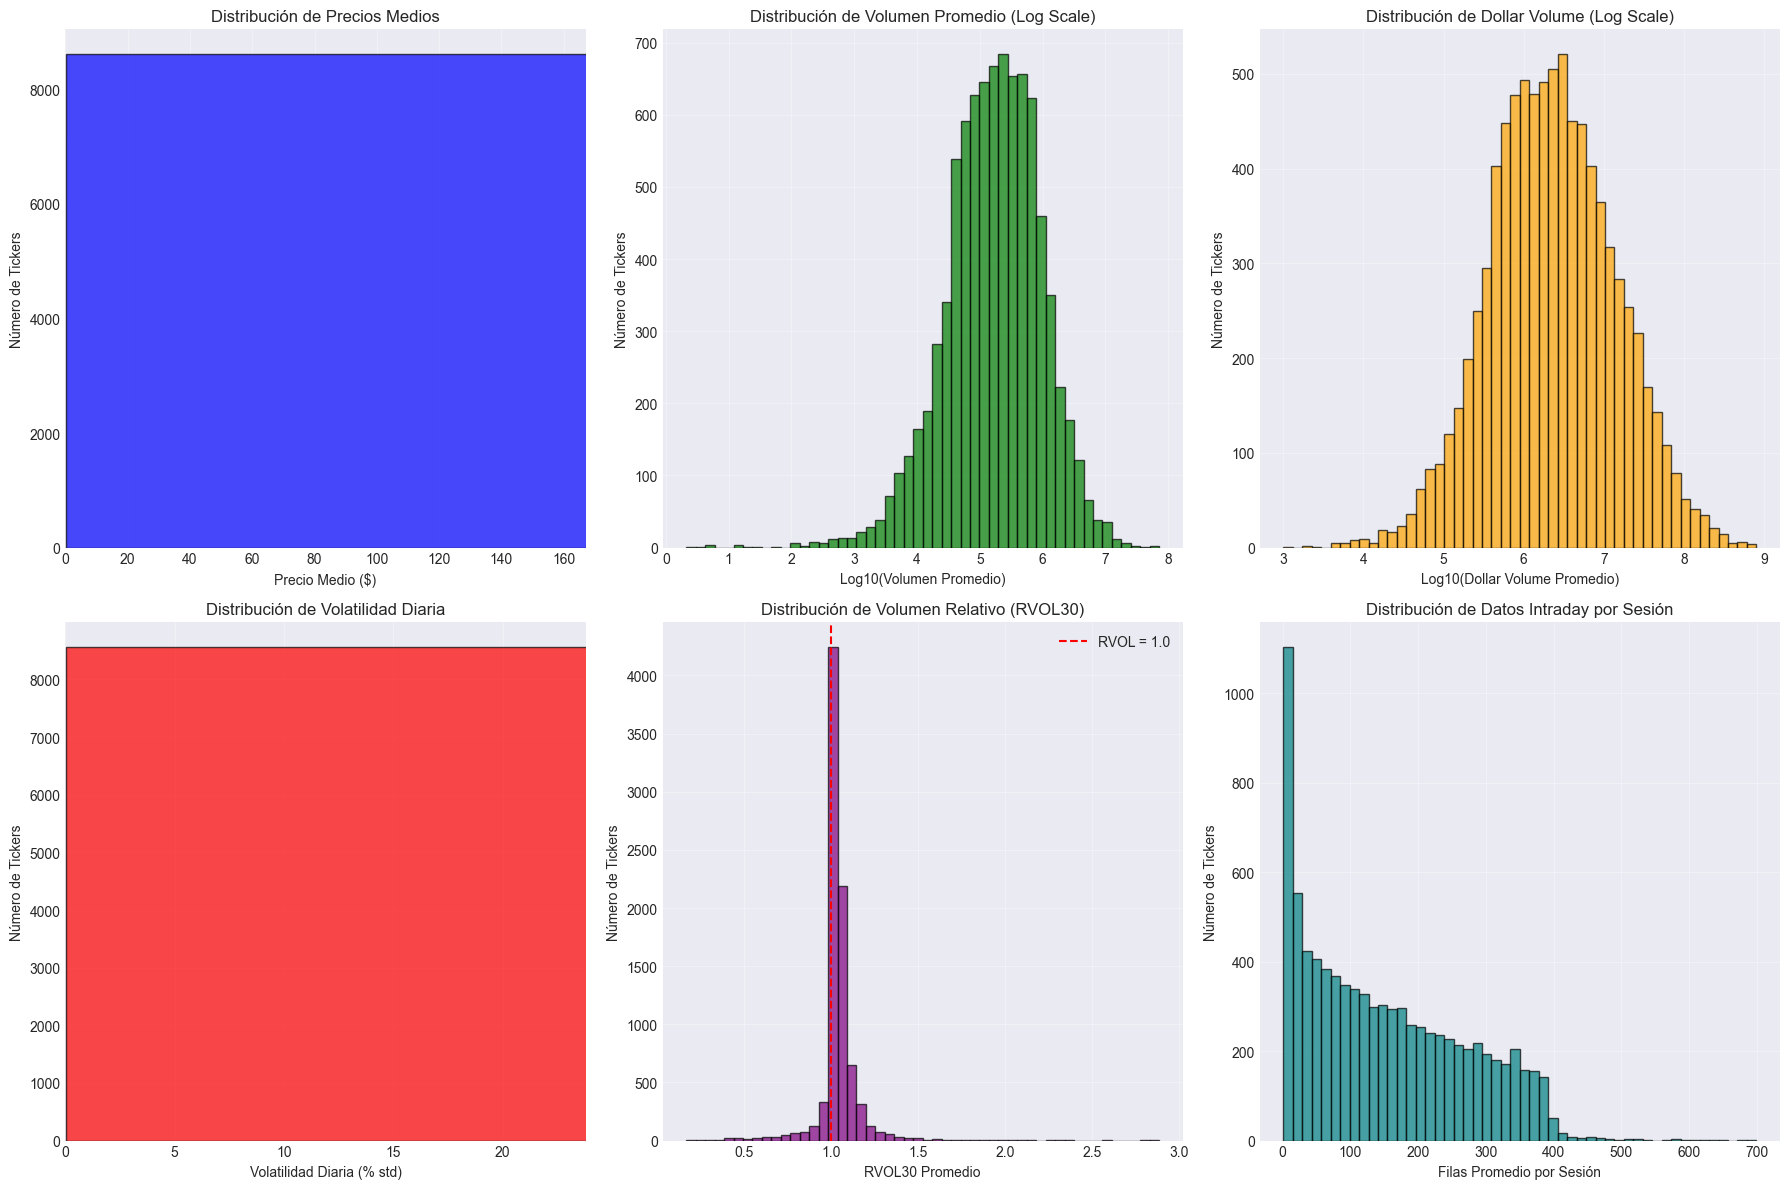

ESTADÍSTICAS DE TRADING
Precio medio promedio: $554443903645.71
Volumen promedio: 602,882
Dollar volume promedio: $10,984,485
Volatilidad promedio: 779.36%
RVOL30 promedio: 1.04
Filas intraday promedio: 150.8


In [10]:
# GRÁFICA 3: Estadísticas de Trading
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 3.1 Distribución de precios medios
axes[0, 0].hist(df_trading['close_mean'].dropna(), bins=100, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Precio Medio ($)')
axes[0, 0].set_ylabel('Número de Tickers')
axes[0, 0].set_title('Distribución de Precios Medios')
axes[0, 0].set_xlim(0, df_trading['close_mean'].quantile(0.95))
axes[0, 0].grid(True, alpha=0.3)

# 3.2 Distribución de volumen promedio
axes[0, 1].hist(np.log10(df_trading['vol_mean'].dropna() + 1), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Log10(Volumen Promedio)')
axes[0, 1].set_ylabel('Número de Tickers')
axes[0, 1].set_title('Distribución de Volumen Promedio (Log Scale)')
axes[0, 1].grid(True, alpha=0.3)

# 3.3 Distribución de dollar volume
axes[0, 2].hist(np.log10(df_trading['dollar_vol_mean'].dropna() + 1), bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('Log10(Dollar Volume Promedio)')
axes[0, 2].set_ylabel('Número de Tickers')
axes[0, 2].set_title('Distribución de Dollar Volume (Log Scale)')
axes[0, 2].grid(True, alpha=0.3)

# 3.4 Volatilidad (std de pctchg)
axes[1, 0].hist(df_trading['pctchg_std'].dropna() * 100, bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Volatilidad Diaria (% std)')
axes[1, 0].set_ylabel('Número de Tickers')
axes[1, 0].set_title('Distribución de Volatilidad Diaria')
axes[1, 0].set_xlim(0, df_trading['pctchg_std'].quantile(0.95) * 100)
axes[1, 0].grid(True, alpha=0.3)

# 3.5 RVOL30
axes[1, 1].hist(df_trading['rvol30_mean'].dropna(), bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('RVOL30 Promedio')
axes[1, 1].set_ylabel('Número de Tickers')
axes[1, 1].set_title('Distribución de Volumen Relativo (RVOL30)')
axes[1, 1].axvline(1.0, color='red', linestyle='--', label='RVOL = 1.0')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 3.6 Session rows (intraday data quality)
axes[1, 2].hist(df_trading['session_rows_mean'].dropna(), bins=50, color='teal', alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('Filas Promedio por Sesión')
axes[1, 2].set_ylabel('Número de Tickers')
axes[1, 2].set_title('Distribución de Datos Intraday por Sesión')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
# print("\n=" * 80)
print("ESTADÍSTICAS DE TRADING")
print("=" * 80)
print(f"Precio medio promedio: ${df_trading['close_mean'].mean():.2f}")
print(f"Volumen promedio: {df_trading['vol_mean'].mean():,.0f}")
print(f"Dollar volume promedio: ${df_trading['dollar_vol_mean'].mean():,.0f}")
print(f"Volatilidad promedio: {df_trading['pctchg_std'].mean()*100:.2f}%")
print(f"RVOL30 promedio: {df_trading['rvol30_mean'].mean():.2f}")
print(f"Filas intraday promedio: {df_trading['session_rows_mean'].mean():.1f}")





## *Métricas diarias agregadas*

🔹 **Distribución de Precios Medios** Casi todos ≤ 20 USD → rango correcto para micro/small caps.

🔹 **Volumen Promedio (Log Scale)** Campana entre 10⁴–10⁶ → 10 k–1 M shares por día. Normal.

🔹 **Dollar Volume (Log Scale)** Campana en 10⁶–10⁷ → ≈ 1–10 M USD por día en actividad típica.

🔹 **Volatilidad Diaria** Casi todos < 10 % → los extremos > 15 % son outliers.

🔹 **Volumen Relativo (RVOL30)** Pico en 1 → volumen estable. Cola > 2 → días anómalos (pumps).

🔹 **Datos Intraday por Sesión** Media 100–200 filas → la mayoría con varias horas de cotización por día. OK.




---
## 4. ANÁLISIS DE LIQUIDEZ Y ACTIVIDAD

In [12]:
# Extraer domain stats
domain_data = []
for ticker_info in tickers_data:
    if ticker_info['status'] == 'success' and 'domain_stats' in ticker_info:
        domain = ticker_info['domain_stats']
        domain_data.append({
            'ticker': ticker_info['ticker'],
            'dollar_vol_gte_5M_pct': domain.get('dollar_vol_gte_5M', {}).get('percentage', 0),
            'pctchg_abs_gte_15pct_pct': domain.get('pctchg_abs_gte_15pct', {}).get('percentage', 0),
            'rvol30_gte_2_pct': domain.get('rvol30_gte_2', {}).get('percentage', 0),
            'e0_days_pct': domain.get('e0_days', {}).get('percentage', 0)
        })

df_domain = pd.DataFrame(domain_data)
print(f"Domain stats extraídas: {len(df_domain):,} tickers")

Domain stats extraídas: 8,617 tickers


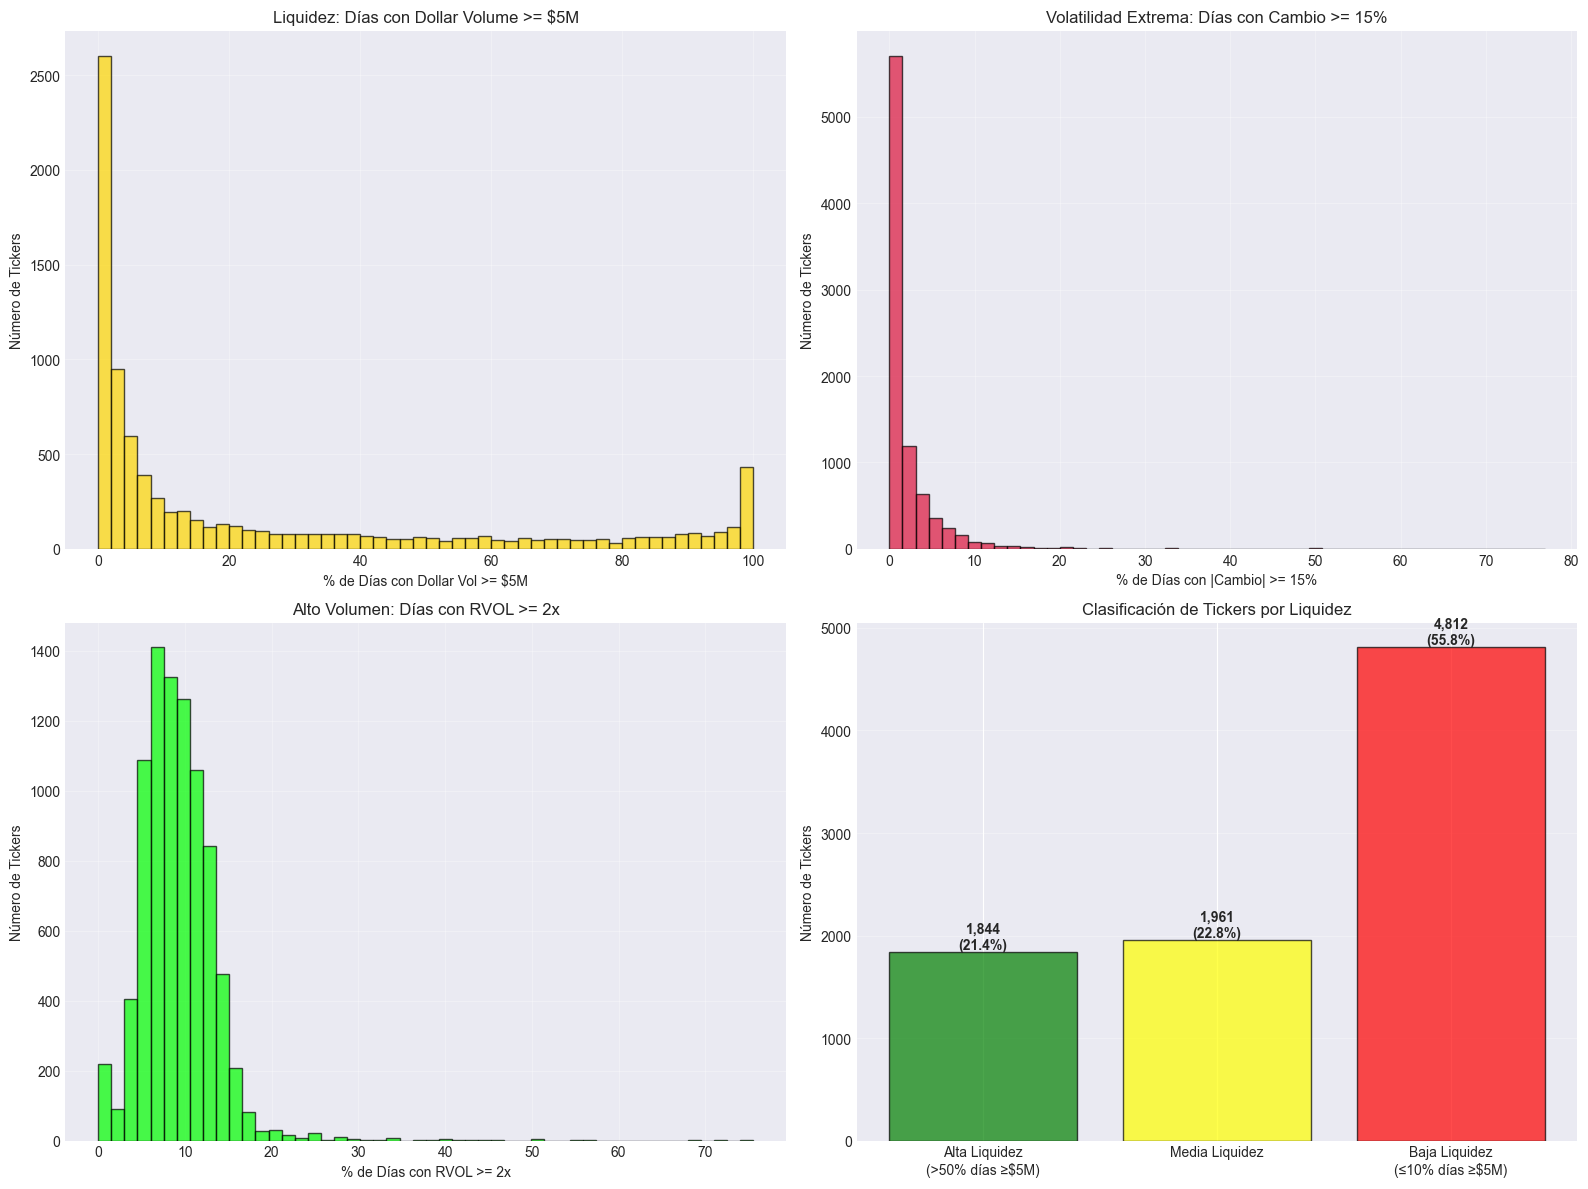

LIQUIDEZ Y ACTIVIDAD
Tickers con alta liquidez (>50% días ≥$5M): 1,844 (21.4%)
Tickers con baja liquidez (≤10% días ≥$5M): 4,812 (55.8%)

Promedio % días con movimientos ≥15%: 2.09%
Promedio % días con RVOL ≥2x: 9.16%


In [13]:
# GRÁFICA 4: Liquidez y actividad
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 4.1 Días con dollar volume >= $5M
axes[0, 0].hist(df_domain['dollar_vol_gte_5M_pct'].dropna(), bins=50, color='gold', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('% de Días con Dollar Vol >= $5M')
axes[0, 0].set_ylabel('Número de Tickers')
axes[0, 0].set_title('Liquidez: Días con Dollar Volume >= $5M')
axes[0, 0].grid(True, alpha=0.3)

# 4.2 Días con movimientos grandes (>= 15%)
axes[0, 1].hist(df_domain['pctchg_abs_gte_15pct_pct'].dropna(), bins=50, color='crimson', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('% de Días con |Cambio| >= 15%')
axes[0, 1].set_ylabel('Número de Tickers')
axes[0, 1].set_title('Volatilidad Extrema: Días con Cambio >= 15%')
axes[0, 1].grid(True, alpha=0.3)

# 4.3 Días con RVOL >= 2x
axes[1, 0].hist(df_domain['rvol30_gte_2_pct'].dropna(), bins=50, color='lime', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('% de Días con RVOL >= 2x')
axes[1, 0].set_ylabel('Número de Tickers')
axes[1, 0].set_title('Alto Volumen: Días con RVOL >= 2x')
axes[1, 0].grid(True, alpha=0.3)

# 4.4 Clasificación de liquidez
liquid_tickers = (df_domain['dollar_vol_gte_5M_pct'] > 50).sum()
low_liquid_tickers = (df_domain['dollar_vol_gte_5M_pct'] <= 10).sum()
med_liquid_tickers = len(df_domain) - liquid_tickers - low_liquid_tickers

liquidity_categories = ['Alta Liquidez\n(>50% días ≥$5M)', 'Media Liquidez', 'Baja Liquidez\n(≤10% días ≥$5M)']
liquidity_counts = [liquid_tickers, med_liquid_tickers, low_liquid_tickers]
colors = ['green', 'yellow', 'red']

axes[1, 1].bar(liquidity_categories, liquidity_counts, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Número de Tickers')
axes[1, 1].set_title('Clasificación de Tickers por Liquidez')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, (cat, count) in enumerate(zip(liquidity_categories, liquidity_counts)):
    axes[1, 1].text(i, count, f'{count:,}\n({count/len(df_domain)*100:.1f}%)', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas
print("LIQUIDEZ Y ACTIVIDAD")
print("=" * 80)
print(f"Tickers con alta liquidez (>50% días ≥$5M): {liquid_tickers:,} ({liquid_tickers/len(df_domain)*100:.1f}%)")
print(f"Tickers con baja liquidez (≤10% días ≥$5M): {low_liquid_tickers:,} ({low_liquid_tickers/len(df_domain)*100:.1f}%)")
print(f"\nPromedio % días con movimientos ≥15%: {df_domain['pctchg_abs_gte_15pct_pct'].mean():.2f}%")
print(f"Promedio % días con RVOL ≥2x: {df_domain['rvol30_gte_2_pct'].mean():.2f}%")



### *Actividad y clasificación por liquidez*

🔹 **Arriba izquierda – % de días con Dollar Vol ≥ 5 M USD**

* Sesgo a 0 → muchas baja liquidez.
* Pico al 100 % → unas pocas grandes o muy activas.

🔹 **Arriba derecha – % de días con |Δp| ≥ 15 %** Caída logarítmica → volatilidad extrema es rara pero existente.

🔹 **Abajo izquierda – % de días con RVOL ≥ 2 ×** Campana en 5–15 % → días “activos” normales.

🔹 **Abajo derecha – Clasificación de Tickers por Liquidez**

| Categoría | Condición             | Tickers | %      |
| --------- | --------------------- | ------- | ------ |
| Alta      | > 50 % de días ≥ $5 M | 1 844   | 21.4 % |
| Media     | 10–50 %               | 1 961   | 22.8 % |
| Baja      | ≤ 10 %                | 4 812   | 55.8 % |

➡️ Tres clases claras que usarás en PASO 3 para priorizar tickers liquidos en detección de eventos E0.




---
## 5. RESUMEN EJECUTIVO

In [14]:
# Crear DataFrame consolidado
df_summary = df_temporal.merge(df_quality[['ticker', 'status', 'market_cap_null_pct', 'total_rows']], on='ticker', how='left')
df_summary = df_summary.merge(df_trading, on='ticker', how='left')
df_summary = df_summary.merge(df_domain, on='ticker', how='left')

print("\n" + "=" * 80)
print("RESUMEN EJECUTIVO DEL UNIVERSO")
print("=" * 80)
print(f"\nTOTAL TICKERS ANALIZADOS: {len(df):,}")
print(f"Tickers con datos exitosos: {(df_quality['status'] == 'success').sum():,}")
print(f"\nCOBERTURA TEMPORAL:")
print(f"  • Rango de años: {df_temporal['min_year'].min()} - {df_temporal['max_year'].max()}")
print(f"  • Cobertura promedio: {df_temporal['years_covered'].mean():.2f} años")
print(f"  • Días de trading promedio: {df_temporal['total_days'].mean():.0f}")

if 'market_cap_null_pct' in df_summary.columns:
    print(f"\nCALIDAD DE DATOS:")
    print(f"  • Tickers SIN market cap: {(df_summary['market_cap_null_pct'] == 100).sum():,}")
    print(f"  • Promedio de filas/ticker: {df_summary['total_rows'].mean():.0f}")

print(f"\nESTADÍSTICAS DE TRADING:")
print(f"  • Precio medio: ${df_trading['close_mean'].mean():.2f}")
print(f"  • Dollar volume medio: ${df_trading['dollar_vol_mean'].mean():,.0f}")
print(f"  • Volatilidad media: {df_trading['pctchg_std'].mean()*100:.2f}%")

print(f"\nLIQUIDEZ:")
print(f"  • Alta liquidez: {liquid_tickers:,} tickers ({liquid_tickers/len(df_domain)*100:.1f}%)")
print(f"  • Baja liquidez: {low_liquid_tickers:,} tickers ({low_liquid_tickers/len(df_domain)*100:.1f}%)")

print("\n" + "=" * 80)


RESUMEN EJECUTIVO DEL UNIVERSO

TOTAL TICKERS ANALIZADOS: 8,617
Tickers con datos exitosos: 8,617

COBERTURA TEMPORAL:
  • Rango de años: 2004 - 2025
  • Cobertura promedio: 7.81 años
  • Días de trading promedio: 1713

CALIDAD DE DATOS:
  • Tickers SIN market cap: 8,617
  • Promedio de filas/ticker: 1713

ESTADÍSTICAS DE TRADING:
  • Precio medio: $554443903645.71
  • Dollar volume medio: $10,984,485
  • Volatilidad media: 779.36%

LIQUIDEZ:
  • Alta liquidez: 1,844 tickers (21.4%)
  • Baja liquidez: 4,812 tickers (55.8%)





* El pipeline intraday → daily funciona correctamente.
* `market_cap_d` está intencionadamente nulo.
* El universo es heterogéneo (21 años completos + muchos delisted).
* Las métricas de volumen, volatilidad y liquidez coinciden con la realidad de las small caps.



In [ ]:
# Exportar summary consolidado
output_file = project_root / "01_DayBook" / "fase_01" / "C_v2_ingesta_tiks_2004_2025" / "notebooks" /"analysis_summary.csv"
df_summary.to_csv(output_file, index=False)
print(f"\n✓ Resumen exportado a: {output_file}")


✓ Resumen exportado a: D:\04_TRADING_SMALLCAPS\01_DayBook\fase_01\C_v2_ingesta_tiks_2004_2025\notebooks\analysis_summary.csv


: 